In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# 設定 data_path
dir_data = '/users/changryan/desktop/data'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)


Path of read in data: /users/changryan/desktop/data/application_train.csv


0    0
1    0
2    0
3    0
4    0
Name: CNT_CHILDREN, dtype: int64

請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

0 個小孩

有 1 - 2 個小孩

有 3 - 5 個小孩

有超過 5 個小孩

In [103]:
#1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5,np.max(app_train['CNT_CHILDREN'].values)]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)


for i in range(app_train['CNT_CHILDREN'].max()+1):
    print(f'{i}個小孩有：{sum(app_train["CNT_CHILDREN"]==i)}')
app_train['CNT_CHILDREN_GROUP'].value_counts()

0個小孩有：215371
1個小孩有：61119
2個小孩有：26749
3個小孩有：3717
4個小孩有：429
5個小孩有：84
6個小孩有：21
7個小孩有：7
8個小孩有：2
9個小孩有：2
10個小孩有：2
11個小孩有：1
12個小孩有：2
13個小孩有：0
14個小孩有：3
15個小孩有：0
16個小孩有：0
17個小孩有：0
18個小孩有：0
19個小孩有：2


(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

In [63]:
#2-1

grp = app_train['CNT_CHILDREN_GROUP'] 
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()



CNT_CHILDREN_GROUP
(-1.001, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

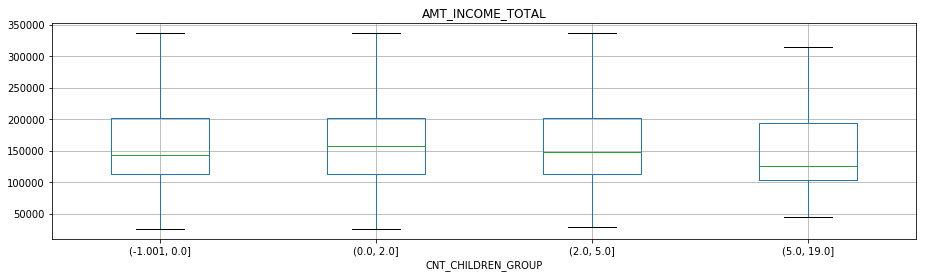

In [104]:
#2-2

plt_by = 'CNT_CHILDREN_GROUP'
plt_column = 'AMT_INCOME_TOTAL'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(15,4))
plt.suptitle('')
plt.show()


請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [70]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-x.mean())/np.std(x) )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781


In [89]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'].describe().loc[:,['count','mean','std']]

count      mean       std
CNT_CHILDREN_GROUP TARGET                              
(-1.001, 0.0]      0       198762.0  0.004377  1.014134
                   1        16609.0 -0.052383  0.810220
(0.0, 2.0]         0        80081.0 -0.000328  0.292176
                   1         7787.0  0.003378  3.226044
(2.0, 5.0]         0         3810.0  0.012642  0.999345
                   1          420.0 -0.114677  1.001017
(5.0, 19.0]        0           33.0 -0.121695  0.989017
                   1            9.0  0.446213  1.025816